<a href="https://colab.research.google.com/github/Kishankumar1328/DBSCAN-Clustering/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm


In [16]:
def createDataPoints(centroidLocation, numSamples, ClusterDeviation):
    x, y = make_blobs(n_samples=numSamples, centers=centroidLocation, cluster_std=ClusterDeviation)
    x = StandardScaler().fit_transform(x)
    return x, y

x, y = createDataPoints([[4, 3], [2, -1], [-1, 4]], 1500, 0.5)


In [17]:
epsilon = 0.3
minimumsamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumsamples).fit(x)
labels = db.labels_
labels


array([0, 0, 0, ..., 2, 0, 0])

In [8]:
core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_]=True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [18]:
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
n_clusters

3

In [19]:
unique_labels=set(labels)
unique_labels

{-1, 0, 1, 2}

In [22]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

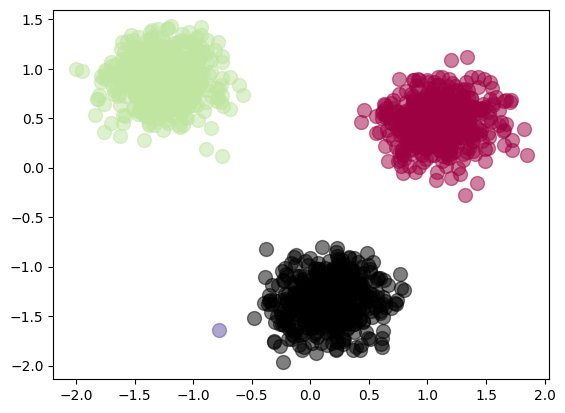

In [27]:
for k,col in zip(unique_labels,colors):
  if k==1:
    col='k'

  class_member_mask=(labels==k)
  xy=x[class_member_mask&core_samples_mask]
  plt.scatter(xy[:, 0], xy[:, 1],s=100, c=[col], marker=u'o', alpha=0.5)


  xy = x[class_member_mask & ~core_samples_mask]
  plt.scatter(xy[:, 0], xy[:, 1],s=100, c=[col], marker=u'o', alpha=0.5)